In [1]:
# -------------------------------------
# --- Go to correct starting folder ---
# -------------------------------------
# (when running jupyter lab in the browser, the notebook starts with CWD = folder where it is located, which breaks imports, ...)
import os
import pathlib

while not ((cwd := pathlib.Path(os.getcwd())) / "pyproject.toml").exists():
    os.chdir(cwd.parent)  # go 1 folder up

# Docs
This notebook produces figures highlighting the curse of dimensionality both for Euclidean distance and cosine similarity.

In [2]:
# --- other imports ---
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

from blog.post_0011.helpers import cosine_similarity, euclidean_distance, sample_vector
from shared.distributions import empirical_pdf
from shared.plotting import save_fig
from shared.plotting.colors import CLR_BLUE, CLR_GREEN, CLR_GREY, CLR_RED

In [3]:
# --- matplotlib ------------------------------------------
plt.rcParams["figure.dpi"] = 150

# --- settings --------------------------------------------
n_dims = [10, 20, 50, 100, 200, 500, 1000]
line_styles = ["-", "-", "-", "--", "--", "--", ":"]
line_colors = [CLR_BLUE, CLR_GREEN, CLR_RED, CLR_BLUE, CLR_GREEN, CLR_RED, CLR_BLUE]

n_samples = 10_000  # number of samples to draw

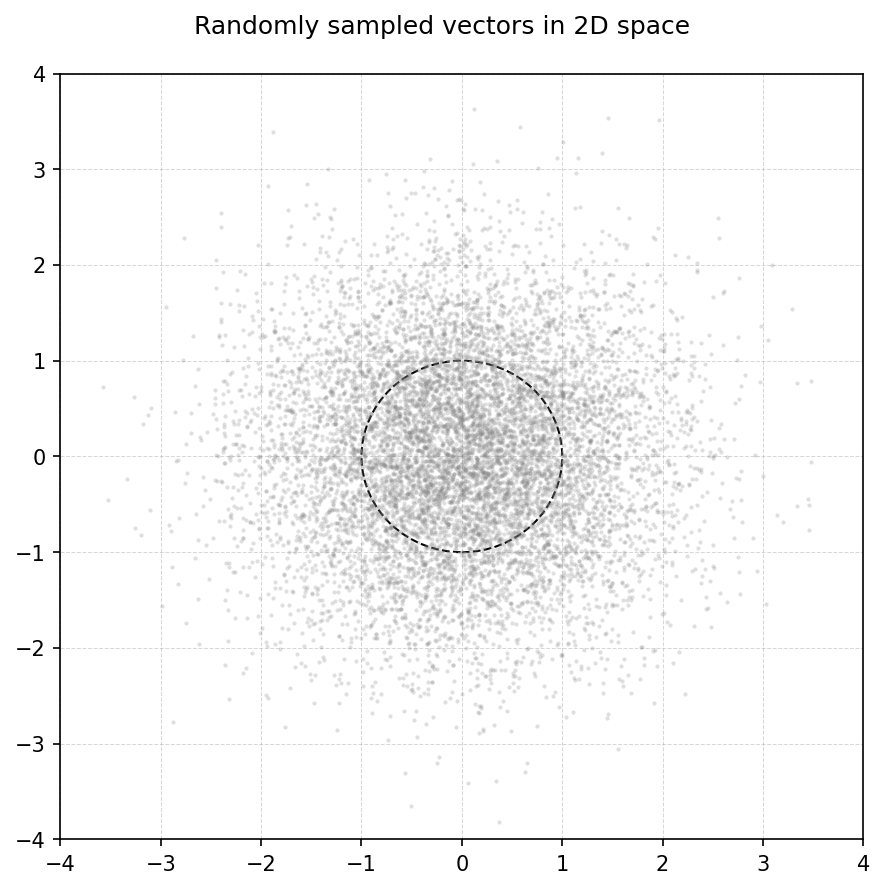

In [4]:
# --- Show distribution -----------------------------------

# init figure
fig, ax = plt.subplots(figsize=(6, 6))

# plot random vectors in 2D space
for i in range(10000):
    v = sample_vector(2)
    ax.plot(v[0], v[1], "o", color=CLR_GREY, alpha=0.25, markersize=2, markeredgewidth=0)

# overlay unit circle
circle = Circle((0, 0), 1, color="k", alpha=1.0, lw=1, ls="--", fill=False)
ax.add_patch(circle)

# decoration
ax.set(xlim=(-4, 4), ylim=(-4, 4))
ax.grid(True, alpha=0.5, lw=0.5, ls="--")

fig.suptitle("Randomly sampled vectors in 2D space")
fig.tight_layout()

# save in various formats
save_fig(fig, post_nr=11, name="random_vectors_2d")

n=   10,  mean=  4.3480,  std=  0.9949
n=   20,  mean=  6.2461,  std=  0.9941
n=   50,  mean=  9.9511,  std=  1.0011
n=  100,  mean= 14.0934,  std=  1.0039
n=  200,  mean= 19.9634,  std=  0.9960
n=  500,  mean= 31.6146,  std=  0.9916
n= 1000,  mean= 44.7041,  std=  0.9958


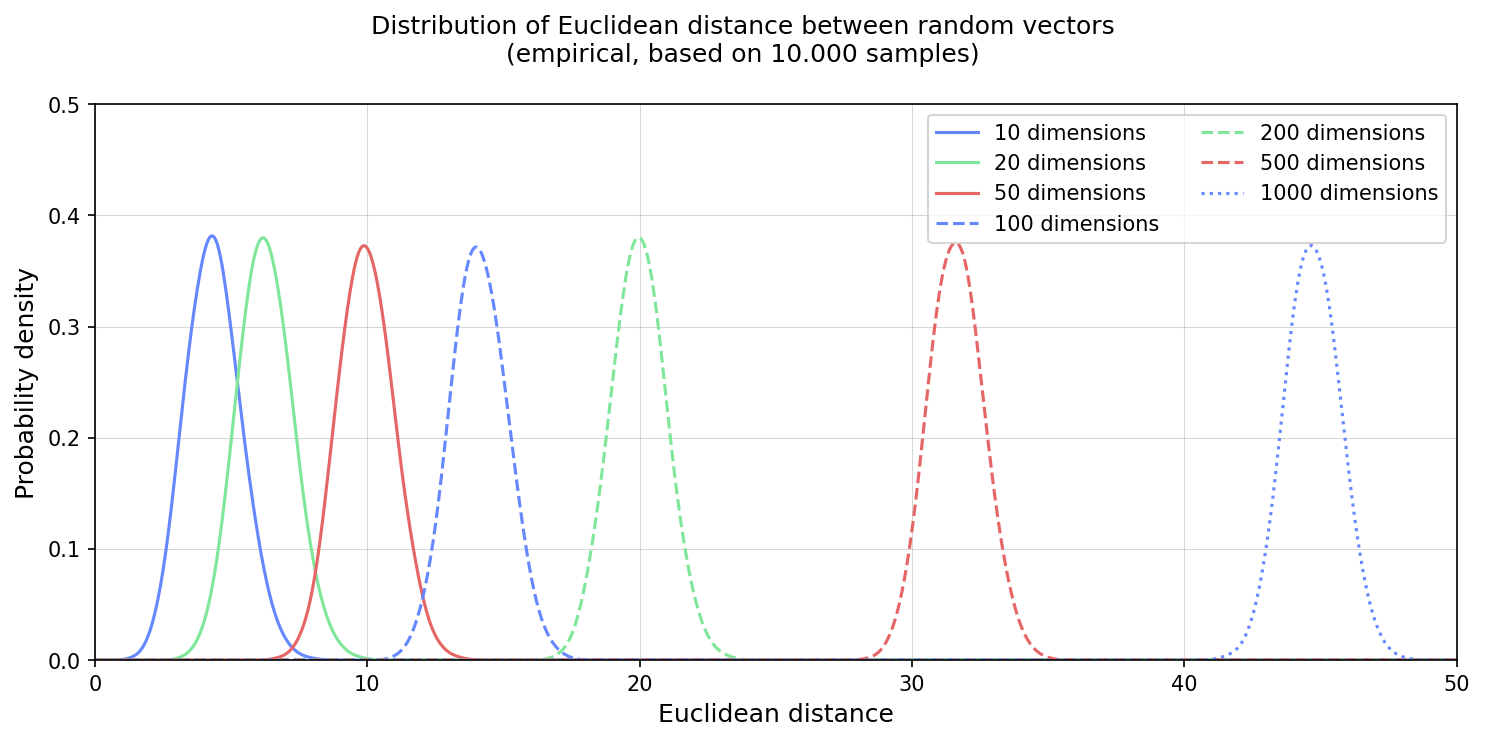

In [5]:
# --- Euclidean distances ---------------------------------

# init figure
fig, ax = plt.subplots(figsize=(10, 5))
x_min = 0.0
x_max = 50.0
x_values = np.linspace(x_min, x_max, 1000)

# plot empirical PDFs
for n, ls, clr in zip(n_dims, line_styles, line_colors):
    # sample Euclidean distances
    samples = [euclidean_distance(sample_vector(n), sample_vector(n)) for _ in range(n_samples)]

    # compute empirical PDF
    pdf_values = empirical_pdf(samples, x_values)

    # plot
    ax.plot(x_values, pdf_values, color=clr, linestyle=ls, label=f"{n} dimensions", lw=1.5)

    # print stats
    print(f"n={n:>5},  mean={np.mean(samples):8.4f},  std={np.std(samples):8.4f}")


ax.set_xlabel("Euclidean distance", fontsize=12)
ax.set_ylabel("Probability density", fontsize=12)

ax.legend(loc="upper right", ncol=2)

ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 0.5)
ax.grid(True, alpha=0.5, lw=0.5)

fig.suptitle(
    "Distribution of Euclidean distance between random vectors\n(empirical, based on 10.000 samples)", fontsize=12
)
fig.tight_layout()

# save in various formats
save_fig(fig, post_nr=11, name="curse_euclidean_distance")

n=   10, mean= -0.0069,  std=  0.3152
n=   20, mean=  0.0004,  std=  0.2233
n=   50, mean= -0.0010,  std=  0.1405
n=  100, mean= -0.0007,  std=  0.1007
n=  200, mean= -0.0002,  std=  0.0704
n=  500, mean= -0.0003,  std=  0.0449
n= 1000, mean=  0.0001,  std=  0.0317


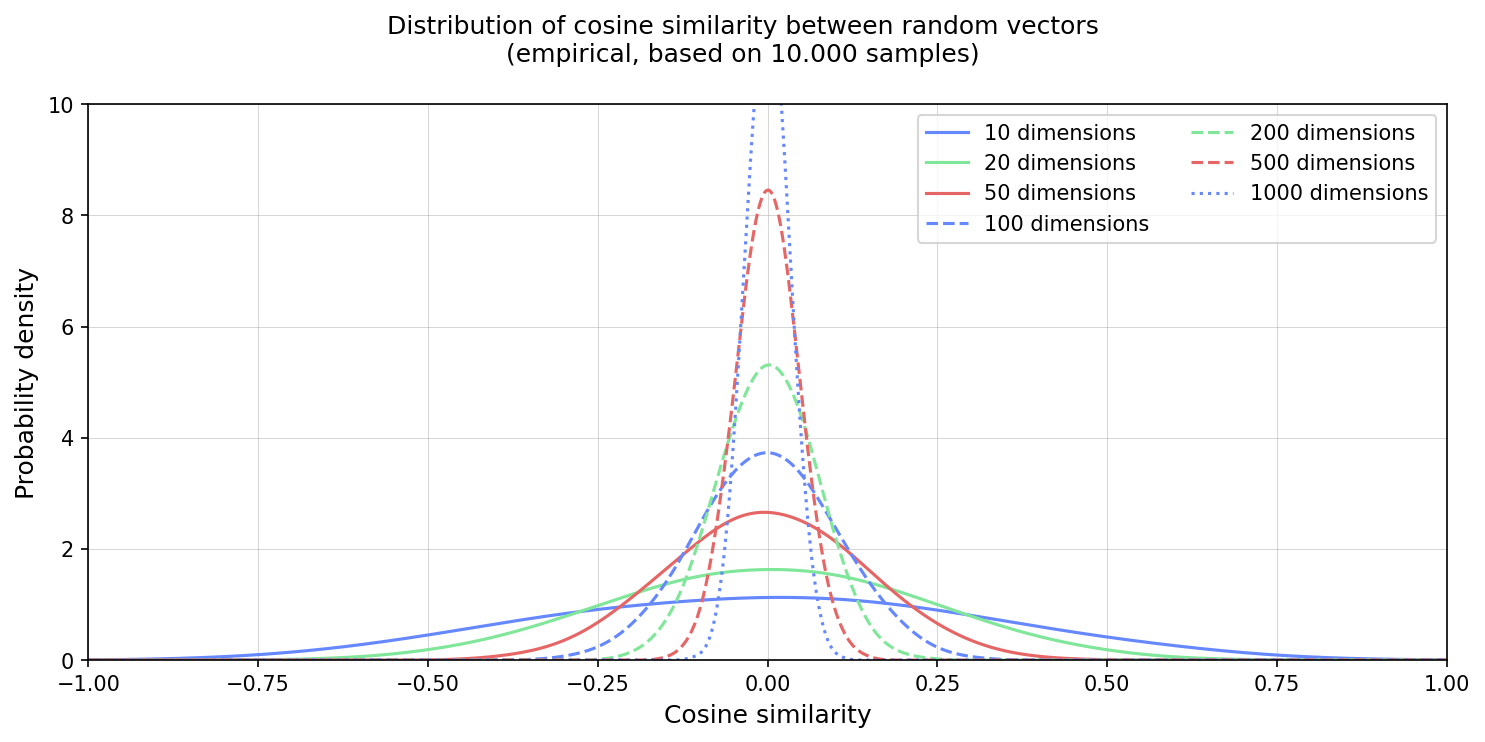

In [6]:
# --- Cosine similarity ---------------------------------

# init figure
fig, ax = plt.subplots(figsize=(10, 5))
x_min = -1.0
x_max = 1.0
x_values = np.linspace(x_min, x_max, 1000)


# plot empirical PDFs
for n, ls, clr in zip(n_dims, line_styles, line_colors):
    # sample cosine similarities
    samples = [cosine_similarity(sample_vector(n), sample_vector(n)) for _ in range(n_samples)]

    # compute empirical PDF
    pdf_values = empirical_pdf(samples, x_values)

    # plot
    ax.plot(x_values, pdf_values, color=clr, linestyle=ls, label=f"{n} dimensions", lw=1.5)

    # print stats
    print(f"n={n:>5}, mean={np.mean(samples):8.4f},  std={np.std(samples):8.4f}")


ax.set_xlabel("Cosine similarity", fontsize=12)
ax.set_ylabel("Probability density", fontsize=12)

ax.legend(loc="upper right", ncol=2)

ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 10)
ax.grid(True, alpha=0.5, lw=0.5)

fig.suptitle(
    "Distribution of cosine similarity between random vectors\n(empirical, based on 10.000 samples)", fontsize=12
)
fig.tight_layout()

save_fig(fig, post_nr=11, name="curse_cosine_similarity")